In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fire=pd.read_csv("D:/Vivek/assingment/17  Support Vector Machines/forestfires.csv")

In [3]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

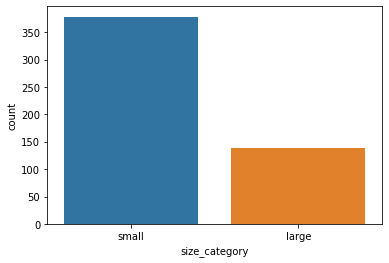

In [6]:
sns.countplot(x='size_category',data =fire)

Text(0, 0.5, 'temp')

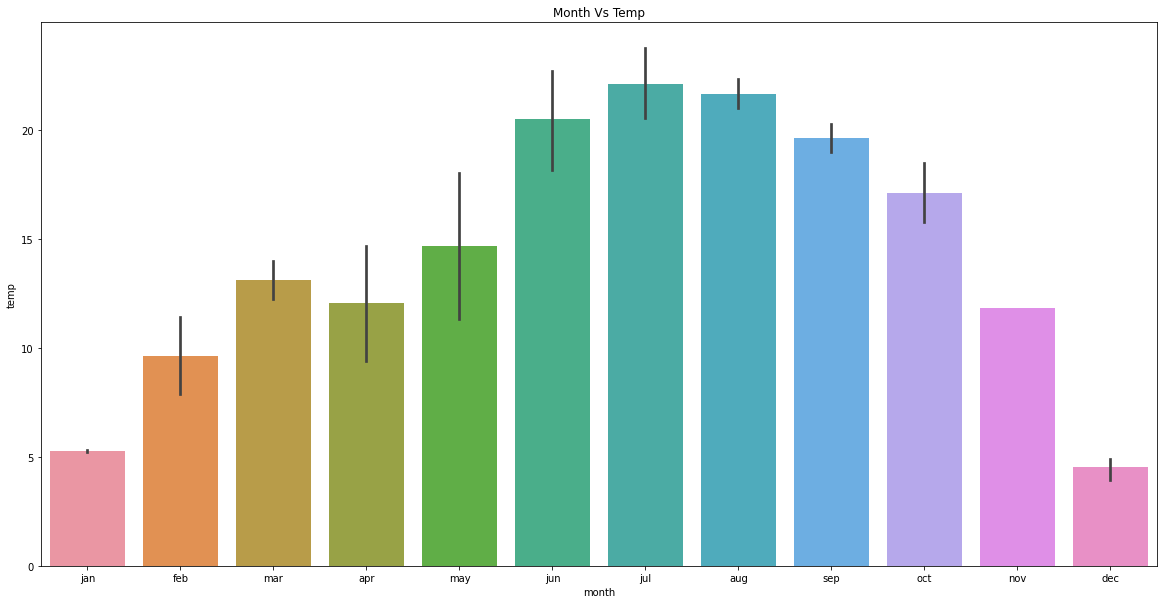

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(x='month',y='temp',data=fire,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

plt.title('Month Vs Temp')
plt.xlabel('month')
plt.ylabel('temp')

In [8]:
fire=fire.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr',	
                               'monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar',
                               'monthmay','monthnov','monthoct','monthsep'],axis=1)

In [9]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

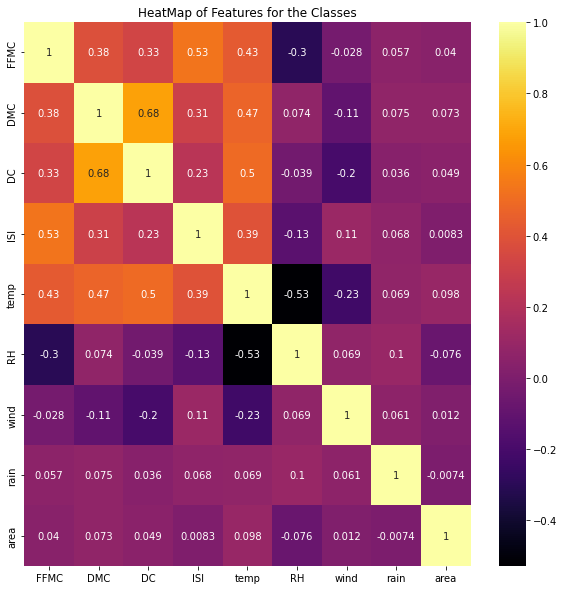

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(fire.corr(),annot=True,cmap="inferno")
plt.title("HeatMap of Features for the Classes")

In [11]:
fire["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
month_data={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
fire.replace(month_data,inplace=True)

In [13]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [14]:
fire['size_category'].unique()

array(['small', 'large'], dtype=object)

In [15]:
fire.size_category.replace(('small','large'),(1,0),inplace=True)

In [16]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [17]:
fire["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [18]:
day_data={'day':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}}
fire.replace(day_data,inplace=True)

In [19]:
X=fire.iloc[:,0:11]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [20]:
Y=fire["size_category"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [21]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

array([[-1.96844301,  0.35772091, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 1.54991494, -1.09090867, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [22]:
scaled_ff=pd.DataFrame(x_scaled,columns=X.columns)
scaled_ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [23]:
x_transformed=scaled_ff

In [24]:
x_transformed

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [25]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [26]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(x_transformed,Y,test_size=0.20,random_state=123)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(413, 11)
(104, 11)
(413,)
(104,)


In [29]:
model=Sequential()
model.add(Dense(units=12,input_dim=11,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(X_train,Y_train, epochs=100, batch_size=10)

Epoch 1/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.7361
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.7361
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7361
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7361
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7361
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7409
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7530
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7676
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8015
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8136
Epoch 11/

42/42 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9927
Epoch 83/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 84/100
42/42 [==============================] - 0s 963us/step - loss: 0.0183 - accuracy: 1.0000
Epoch 85/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 86/100
42/42 [==============================] - 0s 994us/step - loss: 0.0172 - accuracy: 0.9952
Epoch 87/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9952
Epoch 88/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 89/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 90/100
42/42 [==============================] - 0s 987us/step - loss: 0.0173 - accuracy: 0.9976
Epoch 91/100
42/42 [==============================] - 0s 941us/step - loss: 0.0165 - accuracy: 0.9976
Epoch

In [32]:
scores = model.evaluate(X_test,Y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9519
accuracy: 95.19%
